In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
#loading model
model = tf.keras.models.load_model('serial_no.h5')
print('Model loaded successfully')

Model loaded successfully


In [4]:
path = 'test_images/1623370619_0.jpg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 #convert into array and get the normalized output

In [5]:
#size of the original image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 1280
Width of the image = 720


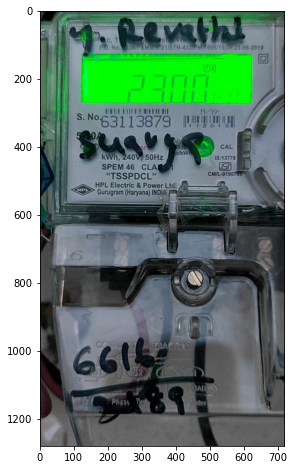

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
#make prediction
coords = model.predict(test_arr)
coords

array([[3.8412052e-13, 4.0354666e-05, 7.5908139e-16, 1.2969915e-16]],
      dtype=float32)

In [10]:
#denormalize the values

denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[2.76566777e-10, 2.90553592e-02, 9.71624175e-13, 1.66014917e-13]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[0, 0, 0, 0]])

(0, 0) (0, 0)


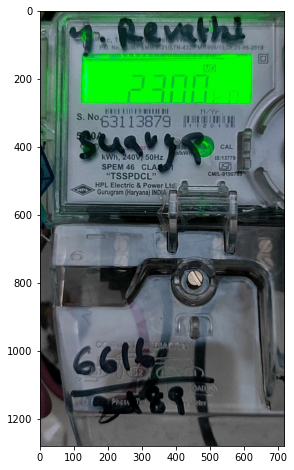

In [12]:
#draw bounding on top the image

xmin, xmax, ymin, ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [13]:
#create pipeline

def object_detection(path):
    #read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    
    #data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 #convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)

    #make prediction
    coords = model.predict(test_arr)

    #denormalize the values

    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)

    #draw bounding on top the image
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    
    return image, coords
    

(0, 0) (0, 0)


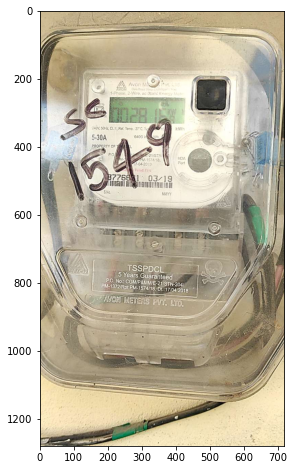

In [14]:
path = 'test_images/1622603162_0.jpg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()